In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Read the CSV file into a pandas dataframe
df = pd.read_csv('svmkernel.csv')
df

,x1,x2,y
0,1,1,-1
1,-1,1,-1
2,-1,-1,-1
3,1,-1,-1
4,2,0,1
5,0,2,1
6,-2,0,1
7,0,-2,1


Accuracy: 1.0


c:\Users\nairm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


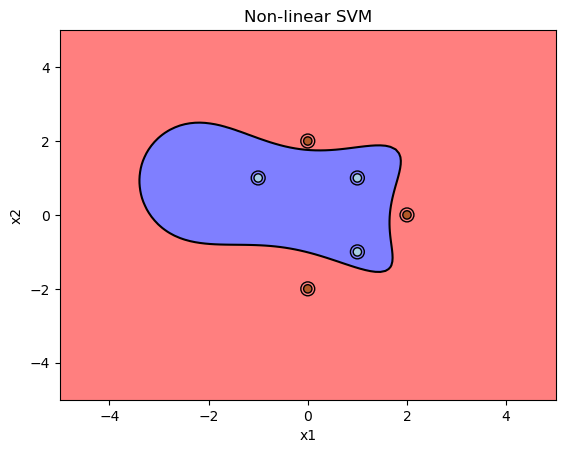

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['y'], test_size=0.25, random_state=0)

# Create a non-linear SVM classifier with a Gaussian RBF kernel
clf = SVC(kernel='rbf', gamma='scale')

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Predict the class labels of the testing data
y_pred = clf.predict(X_test)
y_test = y_test.sort_values()

# Calculate the accuracy of the SVM classifier on the testing data
accuracy = accuracy_score(y_test.to_numpy(), y_pred)

# Print the accuracy of the SVM classifier
print("Accuracy:", accuracy)

# Visualize the data and the decision boundary
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5,5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
Z = clf.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, levels=[-1, 0, 1], alpha=0.5, colors=['blue', 'red'])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='black')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Non-linear SVM')
plt.show()
